In [105]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import shap 
from sklearn.feature_selection import mutual_info_classif


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,  VotingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [106]:
data = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data.csv")

In [107]:
data.head()

,Winner,title_bout,weight_class,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Red,False,Middleweight,3,0.255859,0.015625,0.509478,0.542871,0.002114,0.077554,...,0,2,1,0,Orthodox,187.96,190.50,185.0,34.0,27.0
1,Red,False,Welterweight,3,0.000000,0.000000,0.660000,0.470000,0.000000,0.400000,...,3,3,0,0,Orthodox,190.50,187.96,170.0,37.0,26.0
2,Blue,False,Light Heavyweight,3,0.128906,0.500000,0.314609,0.538398,0.013516,0.162188,...,1,5,5,1,Orthodox,193.04,193.04,205.0,35.0,35.0
3,Red,True,Light Heavyweight,5,0.125000,0.250000,0.565625,0.568750,0.645000,0.098750,...,1,5,0,0,Orthodox,193.04,200.66,205.0,31.0,36.0
4,Blue,False,Women's Bantamweight,3,0.003906,0.250000,0.392988,0.425273,0.723281,0.270820,...,1,0,4,0,Orthodox,167.64,167.64,135.0,32.0,32.0


In [108]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,NaN,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,NaN,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [109]:
#checking for na/nan values

data["Winner"].isna().sum()

3

In [110]:
#discarding nan values from Winner column since they are not useful for the model

df = data.dropna(subset=["Winner"])

In [111]:
df["Winner"].isna().sum()

0

In [112]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,NaN,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,NaN,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [113]:
#now checking for na/nan values in the rest of the columns

df.isna().sum()

Winner             0
title_bout         0
weight_class       0
no_of_rounds       0
B_avg_KD        1661
                ... 
R_Height_cms      23
R_Reach_cms      418
R_Weight_lbs      21
B_age            172
R_age             82
Length: 140, dtype: int64

In [114]:
#since weight is same in each weight class, we can fill na values with the mean of each weight class

df["weight_class"].value_counts()


weight_class
Lightweight              1322
Welterweight             1285
Middleweight             1019
Featherweight             745
Heavyweight               704
Light Heavyweight         690
Bantamweight              671
Flyweight                 338
Women's Strawweight       305
Women's Flyweight         225
Women's Bantamweight      207
Open Weight                86
Catch Weight               81
Women's Featherweight      29
Name: count, dtype: int64

In [115]:
mean_weights = df.groupby("weight_class")[["R_Weight_lbs", "B_Weight_lbs"]].transform('mean')

mean_weights

,R_Weight_lbs,B_Weight_lbs
0,184.590775,184.794494
1,170.449805,169.729183
2,204.365217,202.308696
3,204.365217,202.308696
4,133.550725,132.439614
...,...,...
7705,225.635294,237.120482
7706,225.635294,237.120482
7707,225.635294,237.120482
7708,225.635294,237.120482


In [116]:
# df['R_Weight_lbs'] = df['R_Weight_lbs'].fillna(mean_weights['R_Weight_lbs'])
# df['B_Weight_lbs'] = df['B_Weight_lbs'].fillna(mean_weights['B_Weight_lbs'])

df.loc[df['R_Weight_lbs'].isna(), 'R_Weight_lbs'] = mean_weights['R_Weight_lbs']
df.loc[df['B_Weight_lbs'].isna(), 'B_Weight_lbs'] = mean_weights['B_Weight_lbs']

In [117]:
print(df['R_Weight_lbs'].isna().sum())
print(df['B_Weight_lbs'].isna().sum())

0
0


In [118]:
#using same approach for height

mean_heights = df.groupby("weight_class")[["R_Height_cms", "B_Height_cms"]].transform('mean')

mean_heights

,R_Height_cms,B_Height_cms
0,184.641532,184.251150
1,181.330304,181.063455
2,187.716691,187.315797
3,187.716691,187.315797
4,169.333333,168.940676
...,...,...
7705,186.226824,184.624337
7706,186.226824,184.624337
7707,186.226824,184.624337
7708,186.226824,184.624337


In [119]:
df.loc[df['R_Height_cms'].isna(), 'R_Height_cms'] = mean_heights['R_Height_cms']
df.loc[df['B_Height_cms'].isna(), 'B_Height_cms'] = mean_heights['B_Height_cms']

In [120]:
print(df['R_Height_cms'].isna().sum())
print(df['B_Height_cms'].isna().sum())

0
0


In [121]:
#correlation between reach and height

df[["R_Reach_cms", "R_Height_cms"]].corr()

,R_Reach_cms,R_Height_cms
R_Reach_cms,1.000000,0.896849
R_Height_cms,0.896849,1.000000


In [122]:
#since the correlation is high, we can fill na values in reach with the height. Reach is also the wingspan of the fighter which is usually the same as the height

df.loc[df['R_Reach_cms'].isna(), 'R_Reach_cms'] = df.loc[df['R_Reach_cms'].isna(), 'R_Height_cms']
df.loc[df['B_Reach_cms'].isna(), 'B_Reach_cms'] = df.loc[df['B_Reach_cms'].isna(), 'B_Height_cms']


In [123]:
df['B_Reach_cms'].isna().sum()

0

In [124]:
df.isna().sum()

Winner             0
title_bout         0
weight_class       0
no_of_rounds       0
B_avg_KD        1661
                ... 
R_Height_cms       0
R_Reach_cms        0
R_Weight_lbs       0
B_age            172
R_age             82
Length: 140, dtype: int64

In [125]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,186.226824,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,186.226824,177.8
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,225.635294,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


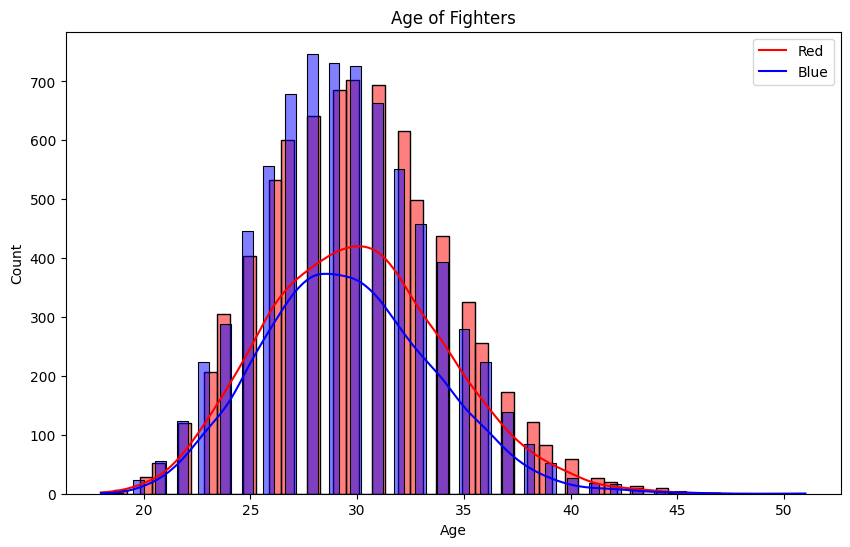

In [126]:
#plot of age in red and blue fighters

plt.figure(figsize=(10, 6))
sns.histplot(df["R_age"], color="red", kde=True)
sns.histplot(df["B_age"], color="blue", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age of Fighters")
plt.legend(["Red", "Blue"])
plt.show()

In [127]:
#the age distribution looks like a normal distribution so we can fill na values with the median of the age because its robust to outliers

# df.loc[df["R_age"].isna(), "R_age"] = df["R_age"].median()
# df.loc[df["B_age"].isna(), "B_age"] = df["B_age"].median()

df = df.dropna(subset=["R_age", "B_age"])

In [128]:
null_columns = df.columns[df.isnull().any()]

print("Columns with null values:")
for column in null_columns:
    print(f"{column}: {df[column].isnull().sum()} null values")

Columns with null values:
B_avg_KD: 1535 null values
B_avg_opp_KD: 1535 null values
B_avg_SIG_STR_pct: 1535 null values
B_avg_opp_SIG_STR_pct: 1535 null values
B_avg_TD_pct: 1535 null values
B_avg_opp_TD_pct: 1535 null values
B_avg_SUB_ATT: 1535 null values
B_avg_opp_SUB_ATT: 1535 null values
B_avg_REV: 1535 null values
B_avg_opp_REV: 1535 null values
B_avg_SIG_STR_att: 1535 null values
B_avg_SIG_STR_landed: 1535 null values
B_avg_opp_SIG_STR_att: 1535 null values
B_avg_opp_SIG_STR_landed: 1535 null values
B_avg_TOTAL_STR_att: 1535 null values
B_avg_TOTAL_STR_landed: 1535 null values
B_avg_opp_TOTAL_STR_att: 1535 null values
B_avg_opp_TOTAL_STR_landed: 1535 null values
B_avg_TD_att: 1535 null values
B_avg_TD_landed: 1535 null values
B_avg_opp_TD_att: 1535 null values
B_avg_opp_TD_landed: 1535 null values
B_avg_HEAD_att: 1535 null values
B_avg_HEAD_landed: 1535 null values
B_avg_opp_HEAD_att: 1535 null values
B_avg_opp_HEAD_landed: 1535 null values
B_avg_BODY_att: 1535 null values
B_avg

In [129]:
numerical_columns = df[null_columns].select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df[null_columns].select_dtypes(include=['object']).columns

In [130]:
#since mean is robust to ouytliers, we can fill na values in numerical columns with the mean of the column

for col in numerical_columns:
    #df[col].fillna(df[col].median(), inplace=True)
    df.loc[df[col].isna(), col] = df[col].median()

for col in categorical_columns:
    #df[col].fillna(df[col].mode()[0], inplace=True)
    df.loc[df[col].isna(), col] = df[col].mode()[0]

In [131]:
null_columns = df.columns[df.isnull().any()]

print("Columns with null values:")
for column in null_columns:
    print(f"{column}: {df[column].isnull().sum()} null values")

Columns with null values:


In [132]:
df['B_Stance'].value_counts()

B_Stance
Orthodox       5628
Southpaw       1457
Switch          400
Open Stance       7
Sideways          1
Name: count, dtype: int64

In [133]:
df['R_Stance'].value_counts()

R_Stance
Orthodox       5628
Southpaw       1494
Switch          356
Open Stance      15
Name: count, dtype: int64

In [134]:
#converting categorical to numerical with one hot encoding

df = pd.concat([df, pd.get_dummies(df[["weight_class"]], prefix="weight_class")], axis=1)
df = pd.concat([df, pd.get_dummies(df[["B_Stance"]], prefix="B_Stance")], axis=1)
df = pd.concat([df, pd.get_dummies(df[["R_Stance"]], prefix="R_Stance")], axis=1)

df.drop(columns=['weight_class', 'B_Stance', 'R_Stance'], inplace=True)

In [135]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7652,7656,7665,7672,7675,7683,7687,7692,7695,7700
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Draw,Red,Red,Draw,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,2,2,2,1,2,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,False,True,True,False,True,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,True,True,True


In [136]:
#check for categories in the Winner column

df["Winner"].value_counts()

Winner
Red     4722
Blue    2631
Draw     140
Name: count, dtype: int64

In [137]:
#dropping draw since the model will be predicting the winner and also they are very few, 143 out of 7564

df = df[df["Winner"] != "Draw"]

In [138]:
df['Winner'] = df['Winner'].replace({'Red': 0, 'Blue': 1})


df['title_bout'] = df['title_bout'].astype(int)

C:\Users\kisha\AppData\Local\Temp\ipykernel_22520\2739264854.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Winner'] = df['Winner'].replace({'Red': 0, 'Blue': 1})


In [139]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7644,7651,7652,7665,7672,7683,7687,7692,7695,7700
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,2,2,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.03125,0.5,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,True,True,False,True,False,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,True,True,True,True


In [140]:
df.to_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned.csv", index=False)

In [141]:

X = df.drop(columns=["Winner"])
y = df["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
#LOGISTIC REGRESSION

log_reg = LogisticRegression(max_iter=10000, solver='saga')
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [143]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.65
Precision: 0.56
Recall: 0.29
F1 Score: 0.38
ROC AUC: 0.68
Confusion Matrix:
[[1194  190]
 [ 581  241]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.76      1384
           1       0.56      0.29      0.38       822

    accuracy                           0.65      2206
   macro avg       0.62      0.58      0.57      2206
weighted avg       0.63      0.65      0.62      2206



In [144]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [145]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [146]:
log_reg_smote = LogisticRegression(max_iter=10000, solver='saga')
log_reg_smote.fit(X_train_scaled, y_train_resampled)

y_pred_lrsmote = log_reg_smote.predict(X_test_scaled)
y_pred_prob_lrsmote = log_reg_smote.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred_lrsmote)
precision = precision_score(y_test, y_pred_lrsmote)
recall = recall_score(y_test, y_pred_lrsmote)
f1 = f1_score(y_test, y_pred_lrsmote)
roc_auc = roc_auc_score(y_test, y_pred_prob_lrsmote)
conf_matrix = confusion_matrix(y_test, y_pred_lrsmote)
class_report = classification_report(y_test, y_pred_lrsmote)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.65
Precision: 0.55
Recall: 0.32
F1 Score: 0.40
ROC AUC: 0.68
Confusion Matrix:
[[1168  216]
 [ 560  262]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75      1384
           1       0.55      0.32      0.40       822

    accuracy                           0.65      2206
   macro avg       0.61      0.58      0.58      2206
weighted avg       0.63      0.65      0.62      2206



In [147]:
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

#standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [148]:
log_reg_undersamp = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg_undersamp.fit(X_train_scaled, y_train_resampled)

#predict on the test set
y_pred_lrunder = log_reg_undersamp.predict(X_test_scaled)
y_pred_prob_lrunder = log_reg_undersamp.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred_lrunder)
recall = recall_score(y_test, y_pred_lrunder)
f1 = f1_score(y_test, y_pred_lrunder)
roc_auc = roc_auc_score(y_test, y_pred_prob_lrunder)
conf_matrix = confusion_matrix(y_test, y_pred_lrunder)
class_report = classification_report(y_test, y_pred_lrunder)

#print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.65
Precision: 0.50
Recall: 0.60
F1 Score: 0.55
ROC AUC: 0.67
Confusion Matrix:
[[889 495]
 [328 494]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1384
           1       0.50      0.60      0.55       822

    accuracy                           0.63      2206
   macro avg       0.61      0.62      0.61      2206
weighted avg       0.64      0.63      0.63      2206



In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

#standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
param_grid = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'C': [0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='f1')

In [151]:
best_model = grid_search.best_estimator_

#predict on the test set
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#print evaluation metrics
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'solver': 'lbfgs'}
Accuracy: 0.64
Precision: 0.50
Recall: 0.63
F1 Score: 0.56
ROC AUC: 0.69
Confusion Matrix:
[[1219  670]
 [ 388  665]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1889
           1       0.50      0.63      0.56      1053

    accuracy                           0.64      2942
   macro avg       0.63      0.64      0.63      2942
weighted avg       0.67      0.64      0.65      2942



In [152]:
rf_model = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
rf_model.fit(X_train_scaled, y_train)

#predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

#print evaluation metrics
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"ROC AUC: {roc_auc_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(class_report_rf)

Random Forest Classifier
Accuracy: 0.64
Precision: 0.50
Recall: 0.15
F1 Score: 0.23
ROC AUC: 0.63
Confusion Matrix:
[[1738  151]
 [ 899  154]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77      1889
           1       0.50      0.15      0.23      1053

    accuracy                           0.64      2942
   macro avg       0.58      0.53      0.50      2942
weighted avg       0.60      0.64      0.57      2942



In [153]:
#random forest with k fold cross validation

rf_model_kf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='precision')
recall_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='recall')
f1_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='f1')
roc_auc_scores = cross_val_score(rf_model_kf, X_train_scaled, y_train, cv=cv, scoring='roc_auc')

print("Random Forest Classifier")
print(f"Accuracy: {accuracy_scores.mean():.2f}")
print(f"Precision: {precision_scores.mean():.2f}")
print(f"Recall: {recall_scores.mean():.2f}")
print(f"F1 Score: {f1_scores.mean():.2f}")
print(f"ROC AUC: {roc_auc_scores.mean():.2f}")


Random Forest Classifier
Accuracy: 0.65
Precision: 0.54
Recall: 0.15
F1 Score: 0.23
ROC AUC: 0.64


In [154]:
from sklearn.ensemble import GradientBoostingClassifier

#initialize and fit the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

#predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

#evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

#print evaluation metrics
print("Gradient Boosting Classifier")
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1 Score: {f1_gb:.2f}")
print(f"ROC AUC: {roc_auc_gb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_gb)
print("Classification Report:")
print(class_report_gb)

Gradient Boosting Classifier
Accuracy: 0.65
Precision: 0.53
Recall: 0.26
F1 Score: 0.35
ROC AUC: 0.65
Confusion Matrix:
[[1653  236]
 [ 782  271]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.88      0.76      1889
           1       0.53      0.26      0.35      1053

    accuracy                           0.65      2942
   macro avg       0.61      0.57      0.56      2942
weighted avg       0.63      0.65      0.62      2942



In [155]:
#XGBClassifier

xgb_model_1 = xgb.XGBClassifier(random_state=42)
xgb_model_1.fit(X_train_scaled, y_train)

#predict on the test set

y_pred_xgb = xgb_model_1.predict(X_test_scaled)
y_pred_prob_xgb = xgb_model_1.predict_proba(X_test_scaled)[:, 1]

#evaluate the model

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGB Classifier")
print(f"Accuracy: {accuracy_xgb:}")
print(f"Precision: {precision_xgb:}")
print(f"Recall: {recall_xgb:}")
print(f"F1 Score: {f1_xgb:}")
print(f"ROC AUC: {roc_auc_xgb:}")
print("Confusion Matrix:")
print(conf_matrix_xgb)



XGB Classifier
Accuracy: 0.6335825968728755
Precision: 0.4839537869062901
Recall: 0.35802469135802467
F1 Score: 0.4115720524017467
ROC AUC: 0.6373285231587684
Confusion Matrix:
[[1487  402]
 [ 676  377]]


In [156]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7644,7651,7652,7665,7672,7683,7687,7692,7695,7700
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,2,2,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.03125,0.5,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,True,True,False,True,False,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,True,True,True,True


In [157]:
#neural nets

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(160, 128)  
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 8)
        self.fc6 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.sigmoid(self.fc6(x))
        return x




In [158]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')


In [159]:
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = outputs.round().squeeze()
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_preds)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")

    conf_matrix = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(conf_matrix)

In [161]:
# X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

# X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# model = NeuralNetwork()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# num_epochs = 1000
# train_model(model, train_loader, criterion, optimizer, num_epochs)

# evaluate_model(model, test_loader)

In [162]:
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False, inplace=True)
print(mutual_info_series)

R_avg_opp_HEAD_att          0.020256
B_avg_SIG_STR_landed        0.017935
R_avg_opp_SIG_STR_landed    0.016737
R_losses                    0.015067
B_avg_DISTANCE_landed       0.014025
                              ...   
R_avg_KD                    0.000000
B_avg_opp_SIG_STR_pct       0.000000
B_Height_cms                0.000000
R_win_by_Submission         0.000000
B_total_title_bouts         0.000000
Length: 159, dtype: float64


In [163]:
top_features = mutual_info_series.head(50).index
X_top = X[top_features]

In [164]:
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled_top = scaler.fit_transform(X_train_top)
X_test_scaled_top = scaler.transform(X_test_top)

In [165]:
X_train_tensor_top = torch.tensor(X_train_scaled_top, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor_top = torch.tensor(X_test_scaled_top, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset_top = TensorDataset(X_train_tensor_top, y_train_tensor)
test_dataset_top = TensorDataset(X_test_tensor_top, y_test_tensor)

train_loader_top = DataLoader(train_dataset_top, batch_size=64, shuffle=True)
test_loader_top = DataLoader(test_dataset_top, batch_size=64, shuffle=False)

In [166]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size=160, hidden_size=128, num_hidden_layers=18, dropout_prob=0.5):
        super(DeepNeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()

        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(dropout_prob))
        self.layers.append(nn.BatchNorm1d(hidden_size))

        for _ in range(num_hidden_layers):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(dropout_prob))
            self.layers.append(nn.BatchNorm1d(hidden_size))

        self.layers.append(nn.Linear(hidden_size, 1))
        self.layers.append(nn.Sigmoid())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x


In [167]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

In [168]:
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = outputs.round().squeeze()
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_preds)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")

    conf_matrix = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(conf_matrix)

In [169]:
# model = DeepNeuralNetwork()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)  # L2 regularization

# num_epochs = 25
# train_model(model, train_loader_top, criterion, optimizer, num_epochs)
# evaluate_model(model, test_loader_top)


In [170]:
# class SimplifiedNeuralNetwork(nn.Module):
#     def __init__(self):
#         super(SimplifiedNeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(len(top_features), 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, 32)
#         self.fc4 = nn.Linear(32, 1)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.5)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.relu(self.fc2(x))
#         x = self.dropout(x)
#         x = self.relu(self.fc3(x))
#         x = self.sigmoid(self.fc4(x))
#         return x

# simpNN = SimplifiedNeuralNetwork()

In [171]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_top, y_train)

# X_train_scaled_top_resampled = scaler.fit_transform(X_train_resampled)
# X_train_tensor_top_resampled = torch.tensor(X_train_scaled_top_resampled, dtype=torch.float32)
# y_train_tensor_resampled = torch.tensor(y_train_resampled.values, dtype=torch.float32)

# train_dataset_top_resampled = TensorDataset(X_train_tensor_top_resampled, y_train_tensor_resampled)
# train_loader_top_resampled = DataLoader(train_dataset_top_resampled, batch_size=64, shuffle=True)

In [172]:
# def init_weights(m):
#     if isinstance(m, nn.Linear):
#         nn.init.xavier_uniform_(m.weight)
#         m.bias.data.fill_(0.001)

# model.apply(init_weights)

In [173]:
# def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
#     model.train()
#     for epoch in range(num_epochs):
#         running_loss = 0.0
#         for inputs, labels in train_loader:
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels.unsqueeze(1))
#             loss.backward()
#             optimizer.step()
#             running_loss += loss.item() * inputs.size(0)

#         epoch_loss = running_loss / len(train_loader.dataset)
#         print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

In [174]:
# def evaluate_model(model, test_loader):
#     model.eval()
#     all_preds = []
#     all_labels = []
#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             outputs = model(inputs)
#             preds = outputs.round().squeeze()
#             all_preds.extend(preds.tolist())
#             all_labels.extend(labels.tolist())

#     accuracy = accuracy_score(all_labels, all_preds)
#     precision = precision_score(all_labels, all_preds)
#     recall = recall_score(all_labels, all_preds)
#     f1 = f1_score(all_labels, all_preds)
#     roc_auc = roc_auc_score(all_labels, all_preds)

#     print(f"Accuracy: {accuracy:.2f}")
#     print(f"Precision: {precision:.2f}")
#     print(f"Recall: {recall:.2f}")
#     print(f"F1 Score: {f1:.2f}")
#     print(f"ROC AUC: {roc_auc:.2f}")

#     conf_matrix = confusion_matrix(all_labels, all_preds)
#     print("Confusion Matrix:")
#     print(conf_matrix)

In [175]:
# num_epochs = 25
# train_model(model, train_loader_top_resampled, criterion, optimizer, num_epochs)

# evaluate_model(model, test_loader_top)


In [176]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7644,7651,7652,7665,7672,7683,7687,7692,7695,7700
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,2,2,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.03125,0.5,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,True,True,False,True,False,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,True,True,True,True


In [177]:
features = df.columns.drop('Winner')
X = df[features].values
y = df['Winner'].values


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [179]:
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [180]:
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'alpha': [0, 0.5, 1],
    'lambda': [1, 1.5, 2]
}
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_res, y_train_res)
best_xgb = xgb_grid.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [181]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_res, y_train_res)
best_rf = rf_grid.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [182]:
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_grid = GridSearchCV(lr_model, lr_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_res, y_train_res)
best_lr = lr_grid.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [183]:
nb_model = GaussianNB()

#Gradient Boosting Classifier
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid.fit(X_train_res, y_train_res)
best_gb = gb_grid.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [184]:
voting_clf = VotingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf), ('lr', best_lr), ('nb', nb_model), ('gb', best_gb)],
    voting='soft'  
)

# Cross-validation setup with StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the ensemble model using cross-validation
cv_results = cross_val_score(voting_clf, X_train_res, y_train_res, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_results}')
print(f'Mean cross-validation accuracy: {cv_results.mean()}')
print(f'Standard deviation of cross-validation accuracy: {cv_results.std()}')


Cross-validation accuracy scores: [0.70209581 0.76646707 0.69461078 0.70508982 0.74850299 0.70658683
 0.72563718 0.71964018 0.73763118 0.72713643]
Mean cross-validation accuracy: 0.7233398270924417
Standard deviation of cross-validation accuracy: 0.02149687969919812


In [185]:
voting_clf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
y_pred = voting_clf.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

# Print test set metrics
print(f'Test set accuracy: {accuracy}')
print(f'Test set precision: {precision}')
print(f'Test set recall: {recall}')
print(f'Test set F1 score: {f1}')
print(f'Test set ROC AUC: {roc_auc}')
print(f'Test set confusion matrix:\n {cm}')


Test set accuracy: 0.6210335448776065
Test set precision: 0.49364791288566245
Test set recall: 0.6618004866180048
Test set F1 score: 0.5654885654885655
Test set ROC AUC: 0.6751051291787968
Test set confusion matrix:
 [[826 558]
 [278 544]]


In [186]:
print(f"Number of features: {X_test.shape[1]}")
print(f"Number of feature names: {len(features)}")


Number of features: 159
Number of feature names: 159


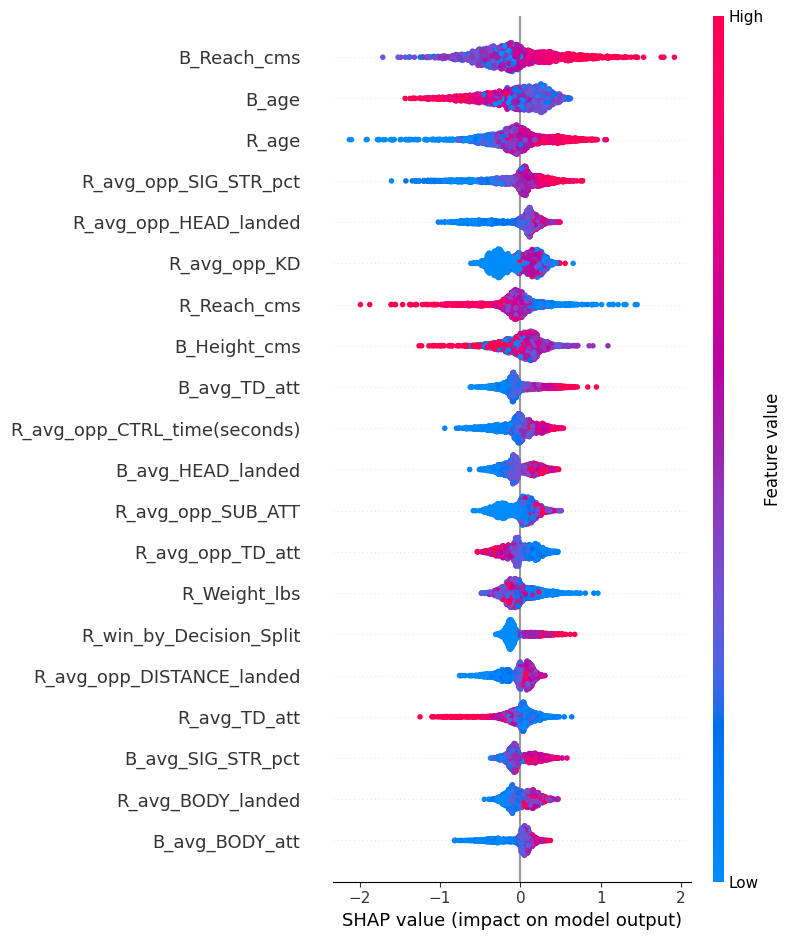

In [187]:
#shapley values for xgb model from voting classifier

explainer = shap.Explainer(voting_clf.estimators_[0])
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features)


DECREASING THE TEST SIZE


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [189]:
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [190]:
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'alpha': [0, 0.5, 1],
    'lambda': [1, 1.5, 2]
}
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_res, y_train_res)
best_xgb = xgb_grid.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [191]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_res, y_train_res)
best_rf = rf_grid.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [192]:
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_grid = GridSearchCV(lr_model, lr_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_res, y_train_res)
best_lr = lr_grid.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [193]:
nb_model = GaussianNB()

#Gradient Boosting Classifier
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid.fit(X_train_res, y_train_res)
best_gb = gb_grid.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [194]:
voting_clf = VotingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf), ('lr', best_lr), ('nb', nb_model), ('gb', best_gb)],
    voting='soft'  
)

# Cross-validation setup with StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the ensemble model using cross-validation
cv_results = cross_val_score(voting_clf, X_train_res, y_train_res, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_results}')
print(f'Mean cross-validation accuracy: {cv_results.mean()}')
print(f'Standard deviation of cross-validation accuracy: {cv_results.std()}')


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kisha\

Cross-validation accuracy scores: [0.74647887 0.70422535 0.73591549 0.71478873 0.74955908 0.70723104
 0.72663139 0.70899471 0.68783069 0.71428571]
Mean cross-validation accuracy: 0.7195941078570186
Standard deviation of cross-validation accuracy: 0.018703417351363133


In [195]:
voting_clf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
y_pred = voting_clf.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

# Print test set metrics
print(f'Test set accuracy: {accuracy}')
print(f'Test set precision: {precision}')
print(f'Test set recall: {recall}')
print(f'Test set F1 score: {f1}')
print(f'Test set ROC AUC: {roc_auc}')
print(f'Test set confusion matrix:\n {cm}')


C:\Users\kisha\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test set accuracy: 0.6284840244731476
Test set precision: 0.48589341692789967
Test set recall: 0.586565752128666
Test set F1 score: 0.531504500642949
Test set ROC AUC: 0.6572633121616909
Test set confusion matrix:
 [[1229  656]
 [ 437  620]]


In [196]:
print(f"Number of features: {X_test.shape[1]}")
print(f"Number of feature names: {len(features)}")


Number of features: 159
Number of feature names: 159


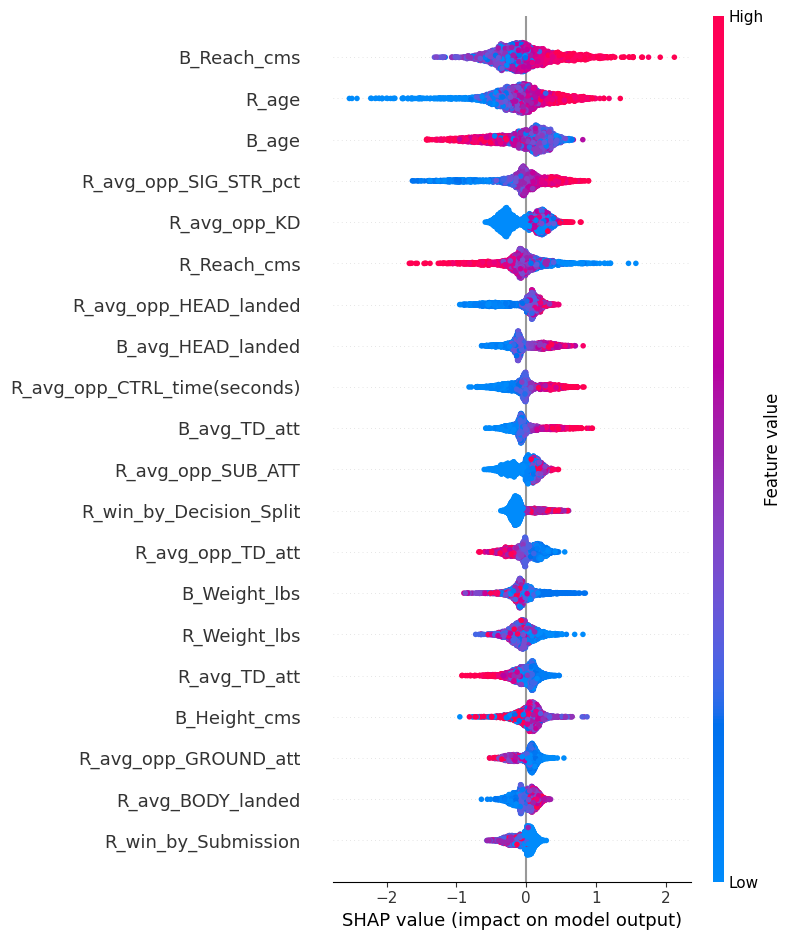

In [197]:
#shapley values for xgb model from voting classifier

explainer = shap.Explainer(voting_clf.estimators_[0])
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features)


In [198]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7644,7651,7652,7665,7672,7683,7687,7692,7695,7700
Winner,0,0,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
title_bout,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,2,2,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.03125,0.5,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Open Stance,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,True,True,False,True,False,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,True,True,True,True


In [199]:
#winner column valuec counts
df['Winner'].value_counts()

Winner
0    4722
1    2631
Name: count, dtype: int64

In [200]:
X = df.drop(columns=["Winner"])
y = df["Winner"]

#addressing class imbalance by oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [201]:
y_resampled.value_counts()

Winner
0    4722
1    4722
Name: count, dtype: int64

In [202]:
#test train split for X_resampled and y_resampled

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [203]:
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'alpha': [0, 0.5, 1],
    'lambda': [1, 1.5, 2]
}
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_scaled, y_train)
best_xgb = xgb_grid.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [204]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [205]:
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_grid = GridSearchCV(lr_model, lr_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_scaled, y_train)
best_lr = lr_grid.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [206]:
nb_model = GaussianNB()

#Gradient Boosting Classifier
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid.fit(X_train_scaled, y_train)
best_gb = gb_grid.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [207]:
voting_clf = VotingClassifier(
    estimators=[('xgb', best_xgb), ('rf', best_rf), ('lr', best_lr), ('nb', nb_model), ('gb', best_gb)],
    voting='soft', 
)

# Cross-validation setup with StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the ensemble model using cross-validation
cv_results = cross_val_score(voting_clf, X_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_results}')
print(f'Mean cross-validation accuracy: {cv_results.mean()}')
print(f'Standard deviation of cross-validation accuracy: {cv_results.std()}')


Cross-validation accuracy scores: [0.67776097 0.71860817 0.71860817 0.71558245 0.71104387 0.70801815
 0.70045386 0.70801815 0.69591528 0.73827534]
Mean cross-validation accuracy: 0.7092284417549168
Standard deviation of cross-validation accuracy: 0.015201036837616312


In [208]:
voting_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_prob = voting_clf.predict_proba(X_test_scaled)[:, 1]
y_pred = voting_clf.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

# Print test set metrics
print(f'Test set accuracy: {accuracy}')
print(f'Test set precision: {precision}')
print(f'Test set recall: {recall}')
print(f'Test set F1 score: {f1}')
print(f'Test set ROC AUC: {roc_auc}')
print(f'Test set confusion matrix:\n {cm}')


Test set accuracy: 0.7300635144671842
Test set precision: 0.6887844979448033
Test set recall: 0.8330965909090909
Test set F1 score: 0.7540983606557377
Test set ROC AUC: 0.8471756263547111
Test set confusion matrix:
 [[ 896  530]
 [ 235 1173]]


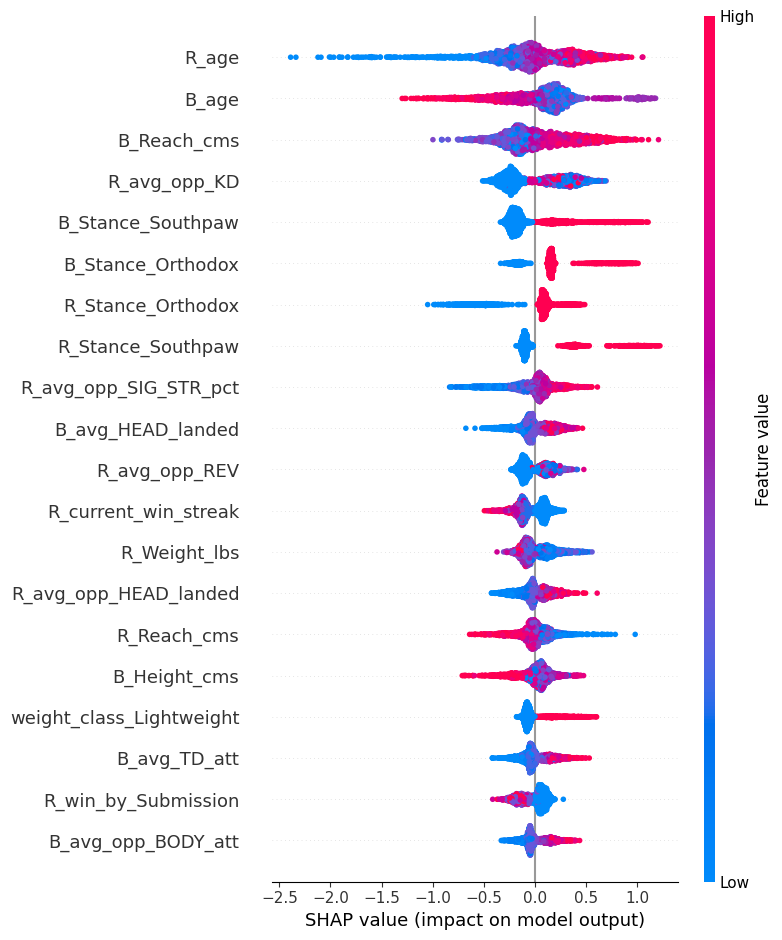

In [209]:
explainer = shap.Explainer(voting_clf.estimators_[0])
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=features)
